# Telco Churn Project

Ryvyn Young   
Codeup Data Science Team   
9/23/2020

# Planning
## Project Description: Why are our customers churning?
#### GOALS:
Find drivers for customer churn.   
Construct a ML classification model that accurately predicts customer churn.  
Create modules that make your process repeateable.   
Document your process well enough to be presented or read like a report.   
#### MVP Questions to answer
Are there clear groupings where a customer is more likely to churn?   
Are there features that indicate a higher propensity to churn?   
Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?

Audience:   Codeup Data Science Team   
Setting:   Virtual 5 minute walk through of Documented Jupyter Notebook   
Brainstorm:  key highlights, key visualizations, prototype   

# Acquire

In [67]:
# import libraries and functions
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

from acquire import get_telco_data
from prepare import prep_telco

In [2]:
# run function to get data using acquire.py and verify data shape
telco = get_telco_data()
telco.shape

(7043, 24)

In [3]:
# Summarize Data
print(telco.info())
print(telco.describe().T, "\n")
print(telco.nunique())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 24 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           7043 non-null   int64  
 1   internet_service_type_id  7043 non-null   int64  
 2   contract_type_id          7043 non-null   int64  
 3   customer_id               7043 non-null   object 
 4   gender                    7043 non-null   object 
 5   senior_citizen            7043 non-null   int64  
 6   partner                   7043 non-null   object 
 7   dependents                7043 non-null   object 
 8   tenure                    7043 non-null   int64  
 9   phone_service             7043 non-null   object 
 10  multiple_lines            7043 non-null   object 
 11  online_security           7043 non-null   object 
 12  online_backup             7043 non-null   object 
 13  device_protection         7043 non-null   object 
 14  tech_sup

NOTES:   
total charges needs to be a float   
gender, partner, and dependents are objects, will need to get dummies
get dummies for "extra_services" as well: multiple_lines, online_security, online_backup, device_protection,
tech_support, streaming_tv, streaming_movies, paperless_billing    
last 3 columns are same as first 3 but with text description instead of numeric, drop   
check for null values and duplicates   
additional required column for tenure in years must be added   
additional column for sum of "extra services" is needed

NOTE:   
no null values found   
no duplicates found, but keeping drop duplicates line in prep file for future use   

In [4]:
# convert total charges to float type
# using .astype did not work, so found this method which will fill cells with errors with a null value
telco['total_charges'] = pd.to_numeric(telco['total_charges'], errors='coerce')

# 11 values in total charges are now null, dropping these rows will have minimal impact
# so drop rows with null values
telco = telco.dropna(axis=0)
# these 2 changes must be made in order for requested visualizations to work
# so they are made here and not in prep file

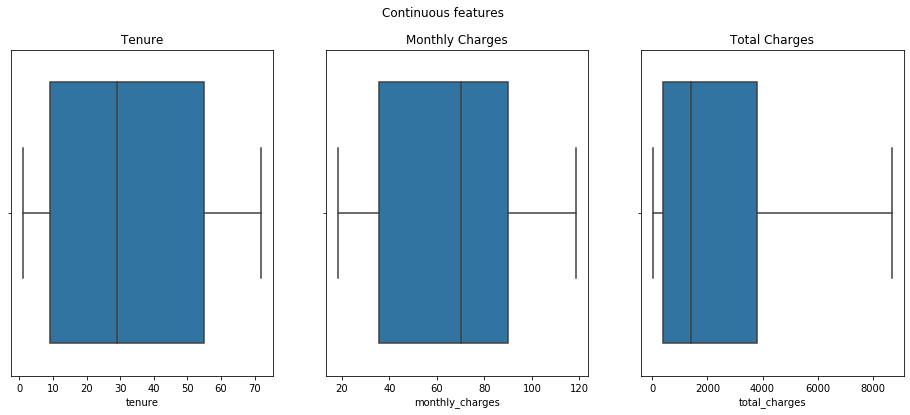

In [5]:
# Create requested plots of individual variables
# use seaborn boxplot to visualize distribution of continuous features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Continuous features')

plt.subplot(131)
sns.boxplot(telco.tenure)
plt.title('Tenure')

plt.subplot(132)
sns.boxplot(telco.monthly_charges)
plt.title('Monthly Charges')

plt.subplot(133)
sns.boxplot(telco.total_charges)
plt.title('Total Charges')

plt.show()

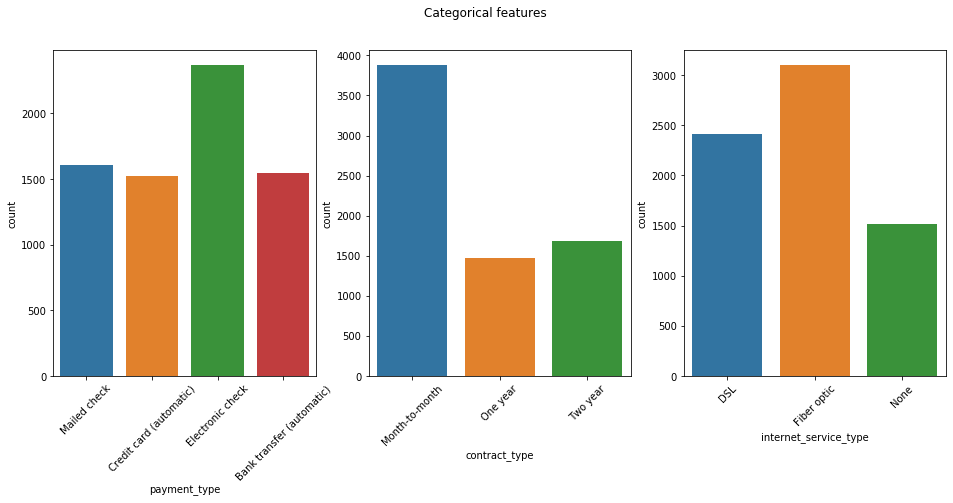

In [6]:
# use Seaborn count plot to visualize distribution of categorical features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Categorical features')

plt.subplot(131)
sns.countplot(telco.payment_type)
plt.xticks(rotation=45)

plt.subplot(132)
sns.countplot(telco.contract_type)
plt.xticks(rotation=45)

plt.subplot(133)
sns.countplot(telco.internet_service_type)
plt.xticks(rotation=45)

plt.show()

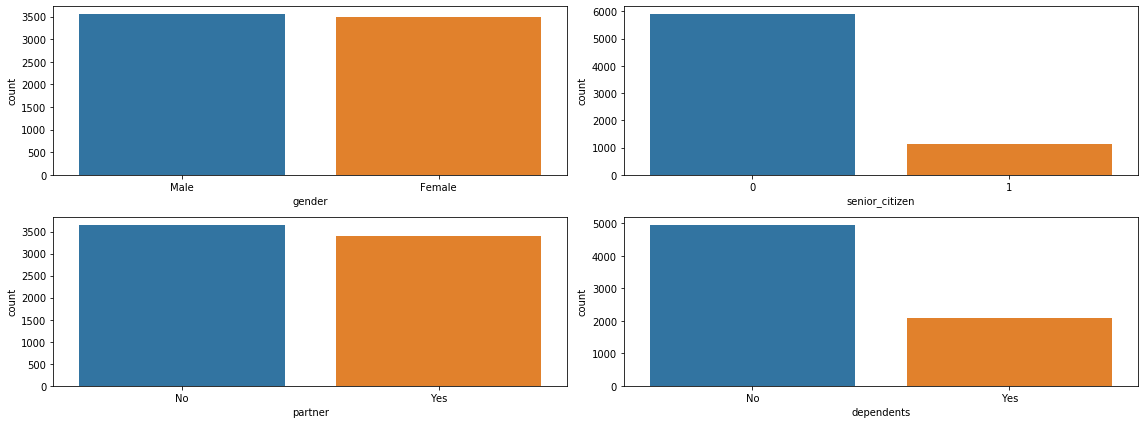

In [7]:
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(221)
sns.countplot(telco.gender)

plt.subplot(222)
sns.countplot(telco.senior_citizen)

plt.subplot(223)
sns.countplot(telco.partner)

plt.subplot(224)
sns.countplot(telco.dependents)

plt.tight_layout()
plt.show()

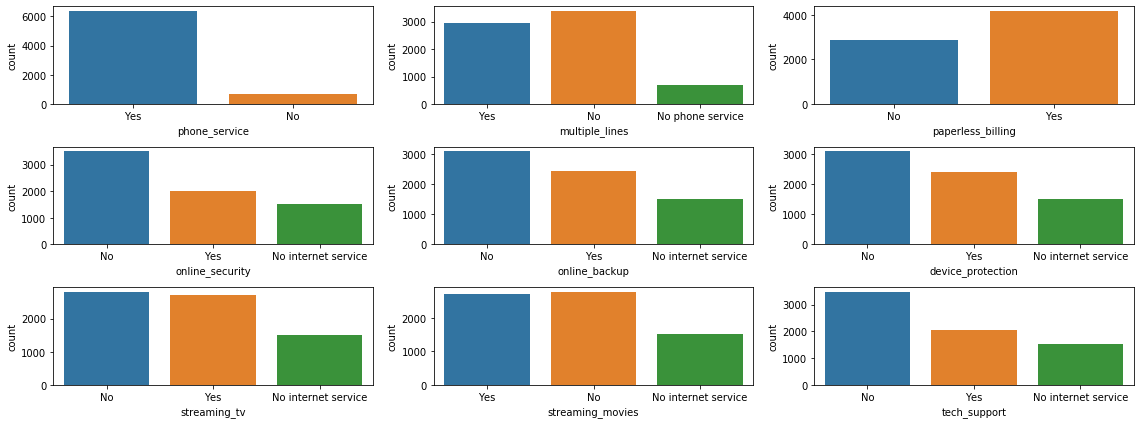

In [8]:
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(331)
sns.countplot(telco.phone_service)

plt.subplot(332)
sns.countplot(telco.multiple_lines)

plt.subplot(333)
sns.countplot(telco.paperless_billing)

plt.subplot(334)
sns.countplot(telco.online_security)

plt.subplot(335)
sns.countplot(telco.online_backup)

plt.subplot(336)
sns.countplot(telco.device_protection)

plt.subplot(337)
sns.countplot(telco.streaming_tv)

plt.subplot(338)
sns.countplot(telco.streaming_movies)

plt.subplot(339)
sns.countplot(telco.tech_support)

plt.tight_layout()
plt.show()

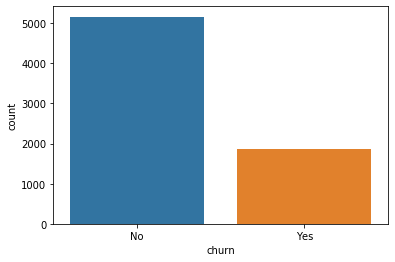

In [9]:
# distribution of target variable, churn, using seaborn
sns.countplot(telco.churn)
plt.show()

# Prepare

In [10]:
# prep file not working, need to debug -- had to add drop customer_id won't model
# run function to prepare data using prepare.py and verify train, validate, and test shape
train, validate, test = prep_telco(telco)
print(train.shape, validate.shape, test.shape)

(3937, 23) (1688, 23) (1407, 23)


#### Now that dummies are in place here is reminder of what values mean   

For yes/no: 0=NO, 1=YES   

Payment Types   
1	Electronic check   
2	Mailed check   
3	Bank transfer (automatic)   
4	Credit card (automatic)

Contract Types   
1	Month-to-month   
2	One year   
3	Two year   

Internet Service Types   
1	DSL   
2	Fiber optic   
3	None   

In [11]:
train.columns

Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'customer_id', 'senior_citizen', 'months_tenure', 'monthly_charges',
       'total_charges', 'years_tenure', 'churn', 'mult_lines', 'online_sec',
       'online_backup', 'device_protect', 'paperless', 'stream_movies',
       'stream_tv', 'tech', 'phone', 'dependents', 'partner', 'Male',
       'extra_serv'],
      dtype='object')

# Explore

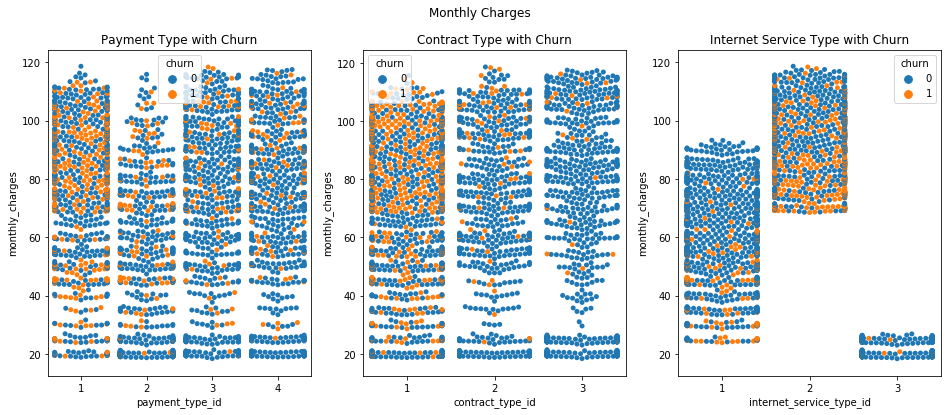

In [12]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Monthly Charges')

plt.subplot(131)
sns.swarmplot(data=train, y='monthly_charges', x='payment_type_id', hue='churn')
plt.title('Payment Type with Churn')

plt.subplot(132)
sns.swarmplot(data=train, y='monthly_charges', x='contract_type_id', hue='churn')
plt.title('Contract Type with Churn')

plt.subplot(133)
sns.swarmplot(data=train, y='monthly_charges', x='internet_service_type_id', hue='churn')
plt.title('Internet Service Type with Churn')

plt.show()

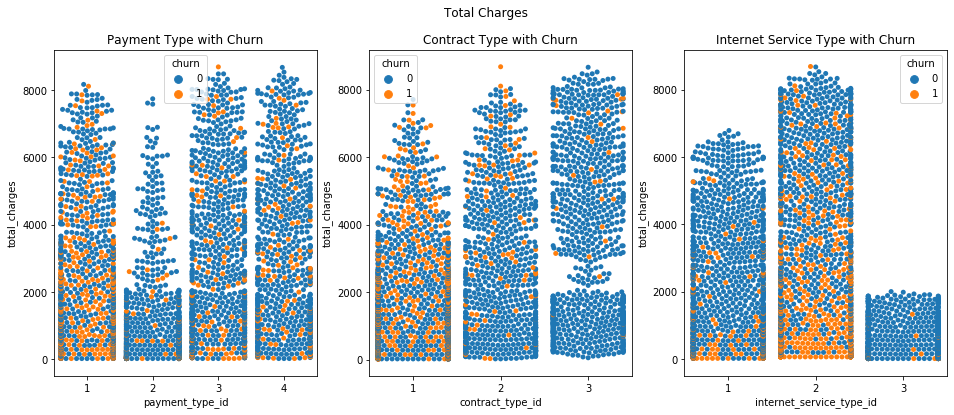

In [13]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features
plt.figure(figsize=(16, 6))
plt.suptitle(f'Total Charges')

plt.subplot(131)
sns.swarmplot(data=train, y='total_charges', x='payment_type_id', hue='churn')
plt.title('Payment Type with Churn')

plt.subplot(132)
sns.swarmplot(data=train, y='total_charges', x='contract_type_id', hue='churn')
plt.title('Contract Type with Churn')

plt.subplot(133)
sns.swarmplot(data=train, y='total_charges', x='internet_service_type_id', hue='churn')
plt.title('Internet Service Type with Churn')

plt.show()

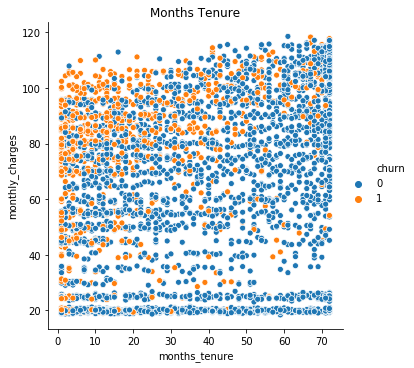

In [14]:
# visualize tenure vs monthly charges and total charges

sns.relplot(x='months_tenure', y='monthly_charges', data=train, hue='churn')
plt.title('Months Tenure')

plt.show()

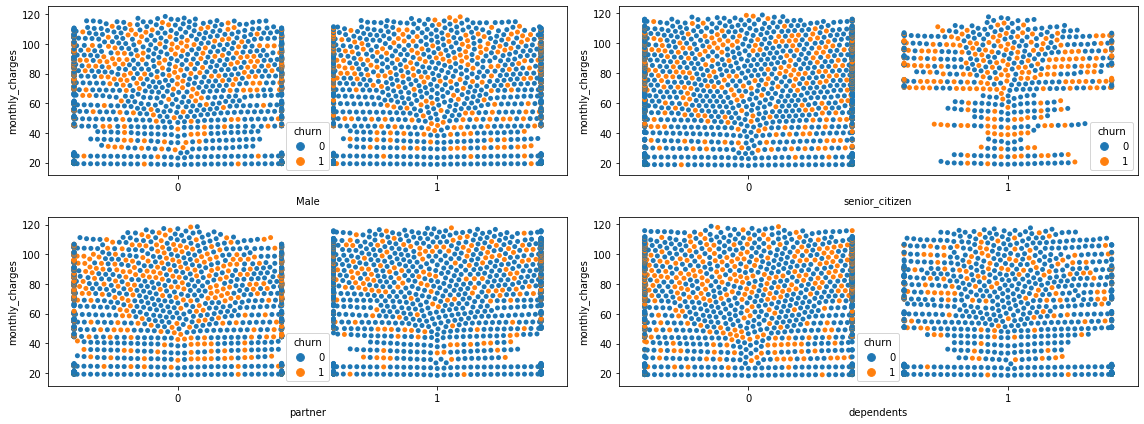

In [15]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(221)
sns.swarmplot(x=train.Male, y=train.monthly_charges, hue=train.churn)

plt.subplot(222)
sns.swarmplot(x=train.senior_citizen, y=train.monthly_charges, hue=train.churn)

plt.subplot(223)
sns.swarmplot(x=train.partner, y=train.monthly_charges, hue=train.churn)

plt.subplot(224)
sns.swarmplot(x=train.dependents, y=train.monthly_charges, hue=train.churn)

plt.tight_layout()
plt.show()

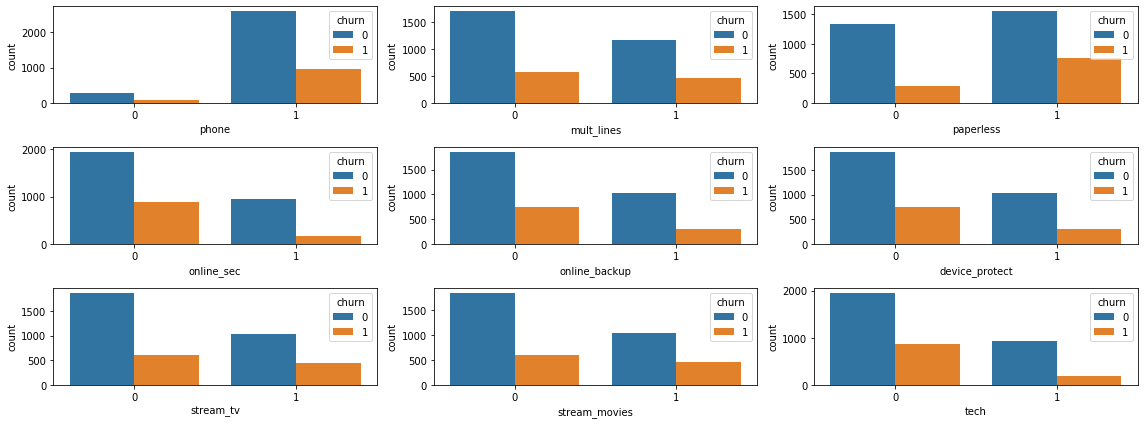

In [16]:
# repeat visualizations from above on only train dataset with churn as factor
# use Seaborn count plot to visualize distribution of categorical features continued
plt.figure(figsize=(16, 6))

plt.subplot(331)
sns.countplot(train.phone, hue=train.churn)

plt.subplot(332)
sns.countplot(train.mult_lines, hue=train.churn)

plt.subplot(333)
sns.countplot(train.paperless, hue=train.churn)

plt.subplot(334)
sns.countplot(train.online_sec, hue=train.churn)

plt.subplot(335)
sns.countplot(train.online_backup, hue=train.churn)

plt.subplot(336)
sns.countplot(train.device_protect, hue=train.churn)

plt.subplot(337)
sns.countplot(train.stream_tv, hue=train.churn)

plt.subplot(338)
sns.countplot(train.stream_movies, hue=train.churn)

plt.subplot(339)
sns.countplot(train.tech, hue=train.churn)

plt.tight_layout()
plt.show()

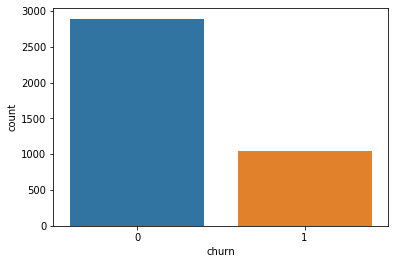

In [17]:
# distribution of target variable, churn, using seaborn on train data
sns.countplot(train.churn)
plt.show()

only noticable high churn areas that seem odd and may indicate further investigation are:   
electronic payment, m2m, fiber optic

notable low churn = those with dependents have very low churn

## Hypotheses Testing  

#### Do those who pay more churn more?  rephrased: is the average monthly charge higher for those who churn?   

Ho: Those who churn have an average monthly charge that is the same or less than those who stay   
Ha: Those who churn have a higher average monthly charge than those who stay

This is comparing the mean of one sub-group to the mean of another sub-group so a two sample t-test is used.   
The test is one tailed because the alternative hypothesis is that one group is higher than the other.

In [58]:
# set alpha and variables for visualization
alpha = .05
churn_sample = train[train.churn==1].monthly_charges
no_churn_sample = train[train.churn==0].monthly_charges

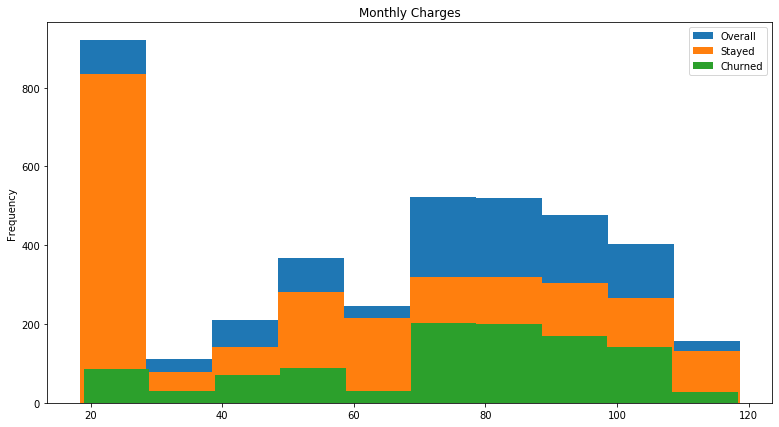

In [64]:
# visualize relationshipt between overall, stayed, and churned monthly_charges
ax = train.monthly_charges.plot.hist(title='Monthly Charges', figsize=(13, 7), label='Overall')
train[train.churn == 0].monthly_charges.plot.hist(ax=ax, label='Stayed')
train[train.churn == 1].monthly_charges.plot.hist(ax=ax, label='Churned')
plt.legend()

Verify Assumptions  
Independent Samples? YES! no observations in the churn sample exist in the no-churn sample.  
Normal Distribution (or at least 30 observations and "kinda" normal)? YES! Plenty of observations    
Equal Variances (the scipy methods we will use has an argument to handle when variances aren't equal)

In [65]:
# check the variances
print(churn_sample.var())
print(no_churn_sample.var())

609.7189655008377
960.2131357344518


In [68]:
# large variance so set equal_var flag to Flase
t, p = stats.ttest_ind(churn_sample, no_churn_sample, equal_var = False)
t, p/2

(13.989840454395496, 4.785948901718317e-43)

In [73]:
# print the results
print("is p/2 < alpha? ", p/2 < alpha)
print("is t > 0? ", t > 0)

is p/2 < alpha?  True
is t > 0?  True


Conclusion: We reject the null hypothesis that the average monthly charge for those who churn is the same or less than those who stay.

#### Do those who have been with us less time churn more?  rephrased: is there a linear relationship between monthly charges and tenure?   

Ho: There is not a linear relationship between monthly charges and tenure   
Ha: There is a linear relationship between monthly charges and tenure

This is testing for a linear relationship using Pearson's R because both variables are continuous

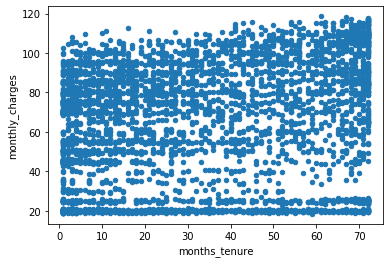

In [72]:
# visualize monthly charges and tenure
train.plot.scatter(y='monthly_charges', x='months_tenure')

In [74]:
# set up the variables
alpha = .05
x = train.months_tenure
y = train.monthly_charges

In [75]:
r, p = stats.pearsonr(x, y)
print('r =', r)
print('p =', p)

r = 0.22764441504354288
p = 1.8881387527098545e-47


Conclusion: We reject the null hypothesis that there is no linear relationship between monthly charges and tenure.   
However, the r value is closer to 0 than to 1 so this may not be a strong relationship.

# Modeling Stage

## Baseline

In [18]:
# Find baseline to beat
train.churn.value_counts(normalize=True)

0    0.734315
1    0.265685
Name: churn, dtype: float64

Highest response is not chruned, if predicted customer stayed, would be correct 73% of the time

##### Notes on selecting model type, features, and hyperparameters   
Decided to create 1 of each type of classification model to run on the train data   
Will use all features in all models for MVP     
Will set minimal or default hyperparameters for these initial models   
With over 20 features will set max depth for Decission Tree to 10   
For Random Forest set max depth to 15 and min leaf samples to 5 leaving n_estimators at 100   
Used default hyperparameters for Logistic Regression   
Set K to 5 for KNN   

In [20]:
# create X and y for modeling
X_train = train.drop(['customer_id', 'churn'],axis=1)
y_train = train[['churn']]

X_train.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,months_tenure,monthly_charges,total_charges,years_tenure,mult_lines,online_sec,...,device_protect,paperless,stream_movies,stream_tv,tech,phone,dependents,partner,Male,extra_serv
6191,2,3,2,0,3,20.25,71.20,0.250000,0,0,...,0,0,0,0,0,1,0,0,0,0
1850,4,1,3,0,66,89.90,5958.85,5.500000,1,1,...,1,0,1,1,1,1,1,1,0,7
5438,3,2,3,0,72,114.55,8306.05,6.000000,1,1,...,1,0,1,1,1,1,1,1,1,7
2171,2,1,3,0,71,71.10,5224.95,5.916667,1,1,...,1,0,0,0,1,1,1,1,0,5
6458,3,3,3,0,62,20.00,1250.10,5.166667,0,0,...,0,0,0,0,0,1,1,0,1,0


## Train Model 1
Decission Tree with all features, max depth of 10

In [21]:
# create model object
clf = DecisionTreeClassifier(max_depth=10, random_state=123)

In [22]:
# fit the model to train dataset
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [23]:
# get accuracy score
clf.score(X_train, y_train)

0.8803657607315215

In [24]:
# get y predictions
y_predclf = clf.predict(X_train)

## Train Model 2
Random Forest with all features, min leaf of 5, max depth of 15, 100 estimators

In [25]:
# create model object
rf = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [26]:
# fit model to train data
rf.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [27]:
# get accuracy score
rf.score(X_train, y_train)

0.8658877317754635

In [28]:
# get y predictions
y_predrf = rf.predict(X_train)

## Train Model 3
Logistic Regression with all features, using default hyperparameters

In [29]:
# create model object
logit = LogisticRegression()

In [30]:
# fit model to train data
logit.fit(X_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [31]:
# Get accuracy score
logit.score(X_train, y_train)

0.8034036068072136

In [32]:
# predict y values
y_predlr = logit.predict(X_train)

In [33]:
# doing this to create df of coef and column names to look for features with more or less impact
print('Coefficient: \n', logit.coef_)
print(X_train.columns)

Coefficient: 
 [[-1.70851730e-01 -1.90412017e-01 -6.48364070e-01  2.52920075e-01
  -3.14056308e-02  3.15223477e-02  3.98079938e-05 -2.61713590e-03
   1.11242482e-01 -3.39174988e-01 -2.80901140e-02 -6.87826984e-02
   3.34902885e-01  7.11647211e-02  3.77521755e-02 -2.62759953e-01
  -3.26173320e-01 -2.19383827e-01 -5.60136208e-02 -5.18011501e-02
  -1.43745490e-01]]
Index(['payment_type_id', 'internet_service_type_id', 'contract_type_id',
       'senior_citizen', 'months_tenure', 'monthly_charges', 'total_charges',
       'years_tenure', 'mult_lines', 'online_sec', 'online_backup',
       'device_protect', 'paperless', 'stream_movies', 'stream_tv', 'tech',
       'phone', 'dependents', 'partner', 'Male', 'extra_serv'],
      dtype='object')


In [34]:
# see columns and coef sorted by value
pd.Series(dict(zip(X_train.columns, logit.coef_[0]))).sort_values()

contract_type_id           -0.648364
online_sec                 -0.339175
phone                      -0.326173
tech                       -0.262760
dependents                 -0.219384
internet_service_type_id   -0.190412
payment_type_id            -0.170852
extra_serv                 -0.143745
device_protect             -0.068783
partner                    -0.056014
Male                       -0.051801
months_tenure              -0.031406
online_backup              -0.028090
years_tenure               -0.002617
total_charges               0.000040
monthly_charges             0.031522
stream_tv                   0.037752
stream_movies               0.071165
mult_lines                  0.111242
senior_citizen              0.252920
paperless                   0.334903
dtype: float64

## Train Model 4
KNN with all features, K value 5

In [35]:
# create model object
knn = KNeighborsClassifier(n_neighbors=5, weights='uniform')

In [36]:
# fit on train data
knn.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [37]:
# get accuracy score
knn.score(X_train, y_train)

0.8348996697993396

In [38]:
# predict y values
y_predknn = knn.predict(X_train)

#### Train Models Summary
###### Accuracy Score

Model 1 Decission Tree = 88%   
Model 2 Random Forest = 87%   
Model 3 Logistic Regression = 80%   
Model 4 K Nearest Neighbors = 83%   

###### Based on this will run Model 1 and Model 2 on validate dataset

## Validate Model 1

In [39]:
# create X and y values for Validate dataset
X_validate = validate.drop(['customer_id', 'churn'],axis=1)
y_validate = validate[['churn']]

X_validate.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,months_tenure,monthly_charges,total_charges,years_tenure,mult_lines,online_sec,...,device_protect,paperless,stream_movies,stream_tv,tech,phone,dependents,partner,Male,extra_serv
879,3,1,1,0,10,62.25,612.95,0.833333,0,1,...,0,0,0,1,1,1,0,0,1,3
1513,2,1,2,0,10,64.90,685.55,0.833333,0,0,...,0,0,1,0,1,1,0,0,0,3
5228,4,2,3,0,67,94.10,6302.80,5.583333,1,0,...,0,0,0,1,1,1,1,1,0,4
3204,1,2,1,1,17,101.80,1752.45,1.416667,0,0,...,1,1,1,1,0,1,0,0,1,5
5415,3,2,3,0,68,89.95,5974.30,5.666667,1,0,...,1,1,0,1,0,1,0,1,0,4


In [40]:
# create model object
clfv = DecisionTreeClassifier(max_depth=10, random_state=123)

In [41]:
# fit model to validate dataset
clfv.fit(X_validate, y_validate)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=10, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=123, splitter='best')

In [42]:
# get model accuracy score
clf.score(X_validate, y_validate)

0.7511848341232228

In [43]:
# get y predictions
y_predclfv = clfv.predict(X_train)

## Validate Model 2

In [44]:
# create model object
rfv = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [45]:
# fit model to validate dataset
rfv.fit(X_validate, y_validate)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [46]:
# get accuracy score
rfv.score(X_validate, y_validate)

0.8803317535545023

In [47]:
# get y predictions
y_predrfv = rfv.predict(X_validate)

#### Validate Models Summary
###### Accuracy Score

Model 1 Decission Tree = 75% - this is a significant drop from 88% on the train dataset   
Model 2 Random Forest = 88%   

###### Based on this will run Model 2 only on test dataset

## Test Model

In [48]:
# create X and y for test dataset
X_test = test.drop(['customer_id', 'churn'],axis=1)
y_test = test[['churn']]

X_test.head()

,payment_type_id,internet_service_type_id,contract_type_id,senior_citizen,months_tenure,monthly_charges,total_charges,years_tenure,mult_lines,online_sec,...,device_protect,paperless,stream_movies,stream_tv,tech,phone,dependents,partner,Male,extra_serv
3374,3,2,1,0,60,74.35,4453.30,5.000000,1,0,...,0,0,0,0,0,1,1,1,1,1
6498,4,3,3,0,70,20.05,1360.25,5.833333,0,0,...,0,0,0,0,0,1,1,1,1,0
6366,3,3,2,0,17,19.90,329.75,1.416667,0,0,...,0,0,0,0,0,1,1,1,1,0
5666,4,3,1,0,1,20.75,20.75,0.083333,0,0,...,0,0,0,0,0,1,0,0,1,0
1253,4,1,2,0,18,54.40,957.10,1.500000,0,0,...,1,1,0,0,1,1,1,1,0,3


In [49]:
# create model object
rft = RandomForestClassifier(bootstrap=True, 
                            class_weight=None, 
                            criterion='gini',
                            min_samples_leaf=5,
                            n_estimators=100,
                            max_depth=15, 
                            random_state=123)

In [50]:
# fit model to test dataset
rft.fit(X_test, y_test)

RandomForestClassifier(bootstrap=True, ccp_alpha=0.0, class_weight=None,
                       criterion='gini', max_depth=15, max_features='auto',
                       max_leaf_nodes=None, max_samples=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=5, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, n_estimators=100,
                       n_jobs=None, oob_score=False, random_state=123,
                       verbose=0, warm_start=False)

In [51]:
# get accuracy score
rft.score(X_test, y_test)

0.8727789623312011

In [52]:
# get y predictions
y_predrft = rft.predict(X_test)

#### Test Model Summary
###### Accuracy Score
  
Model 2 Random Forest = 88%   

###### Model 2 shows a consisent accuracy prediction between 87%-88% on all datasets.
###### This is also a significant improvement from the 73% baseline accuracy.

In [55]:
# # Create .csv deliverable of predicted values
# # create dataframes of all the predicted and actual values for the target variable
trainrf = pd.DataFrame({'customer_id': train.customer_id, 'pred_churn': y_predrf, 'actual_churn': y_train.churn})
validaterf = pd.DataFrame({'customer_id': validate.customer_id, 'pred_churn': y_predrfv, 'actual_churn': y_validate.churn})
testrf = pd.DataFrame({'customer_id': test.customer_id, 'pred_churn': y_predrft, 'actual_churn': y_test.churn})

# concat these into one dataframe
pred_churn = pd.concat([trainrf.sort_index(), validaterf.sort_index(), testrf.sort_index()], axis=0).sort_index()
pred_churn.sample(25)

,customer_id,pred_churn,actual_churn
5702,3363-EWLGO,0,0
5640,2303-PJYHN,0,0
3916,6900-PXRMS,1,1
2551,0581-MDMPW,0,0
6430,0480-KYJVA,0,0
2784,1771-OADNZ,1,1
5002,8329-UTMVM,0,0
2604,0869-PAPRP,0,0
2708,1389-CXMLU,1,1
2845,2070-XYMFH,0,0


In [56]:
# write the pred_churn to a .csv file
pred_churn.to_csv('pred_churn.csv')

# Delivery Stage

### Model performance Summary
Model 2 Random Forest with 5 min leaf samples and a max depth of 15 preforms the best on all datasets and does not appear to be overfit on any of them. Accuracy for this model is between 87% and 88% on all datasets.

#### MVP Questions to answer
Are there clear groupings where a customer is more likely to churn?    
1) No clear groupings identified   
2) need to investigate: those with partner or with children may be more likely to stay   

Are there features that indicate a higher propensity to churn?     
1) Fiber Optic customers show a high churn rate and appear to pay more, possible that customers feel the service is not worth the cost? Or that there is not enough of an improved performance for customers to accept the higher rate?  

Is there a price threshold for specific services where the likelihood of churn increases once price for those services goes past that point?   
1) statistics testing does show customers who churn are paying more on average than those who stay   
2) statistics testing shows a weak relationship between monthly charges and tenure

# Conclusions

Exploritory analysis has not yet revealed any clear drivers or answers at this time.   
However, a random forest model using all available variables does produce a predictive model that is more effective than the baseline accuracy and does not appear to be overfit to the data.   
While the logistic regression model was the poorest performing model, dropping the least impactful coefficients may provide further improvement.   

###### Next Steps    
Continue exploration, in particular a deeper dive into Fiber Optic as well as partners and dependents   
Test a models with reduced features, particularly eliminating total charges and years tenure   

Additional files delivered with this notebook:   
readme.md   
acquire.py   
perpare.py   
pred_churn.csv   

In [76]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3937 entries, 6191 to 4689
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   payment_type_id           3937 non-null   int64  
 1   internet_service_type_id  3937 non-null   int64  
 2   contract_type_id          3937 non-null   int64  
 3   customer_id               3937 non-null   object 
 4   senior_citizen            3937 non-null   int64  
 5   months_tenure             3937 non-null   int64  
 6   monthly_charges           3937 non-null   float64
 7   total_charges             3937 non-null   float64
 8   years_tenure              3937 non-null   float64
 9   churn                     3937 non-null   uint8  
 10  mult_lines                3937 non-null   uint8  
 11  online_sec                3937 non-null   uint8  
 12  online_backup             3937 non-null   uint8  
 13  device_protect            3937 non-null   uint8  
 14  paper